In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

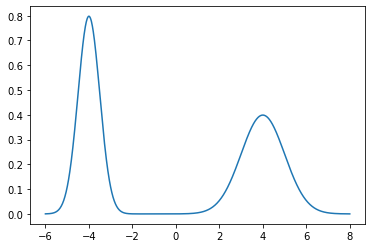

In [2]:
x = np.linspace(-6, 8, 1000)

def p_function(points):
    return sts.norm.pdf(points, loc=-4, scale=0.5) + sts.norm.pdf(points, loc=4, scale=1)

plt.plot(x, p_function(x))

In [3]:
def q_function(x, x_2, epsilon):
    return sts.norm.pdf(x, loc=x_2, scale=epsilon)

def q_sample(center, epsilon):
    return sts.norm.rvs(loc=center, scale=epsilon)

In [4]:
def walk(e=0.5):
    point_x = np.random.choice(x)
    accepted = []
    for t in range(1000):
        x_star = q_sample(point_x, e)
        a = p_function(x_star)/p_function(point_x) * q_function(point_x, x_star, e)/q_function(x_star, point_x, e)
        probability = min(1, a)
        n = np.random.random()
        if probability > n:
            accepted.append(x_star)
            point_x = x_star
            
    plt.figure(figsize=(12,8))
    plt.plot(x, p_function(x), label="target distribution")
    plt.axhline(0, c="black")
    plt.plot(accepted, np.linspace(0, 1, len(accepted)), linewidth=0.5, label="sample sequence")
    plt.plot(accepted, sts.uniform.rvs(loc=-0.075, scale=0.05, size=len(accepted)), ',', alpha=0.9, label="samples")
    plt.legend()
    plt.show()

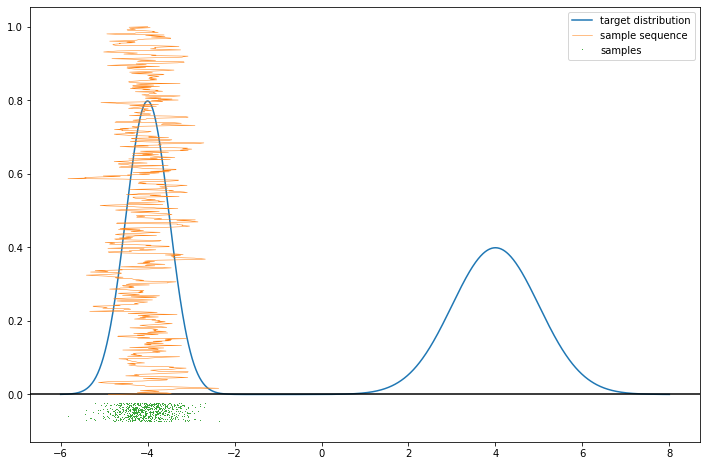

In [5]:
walk()

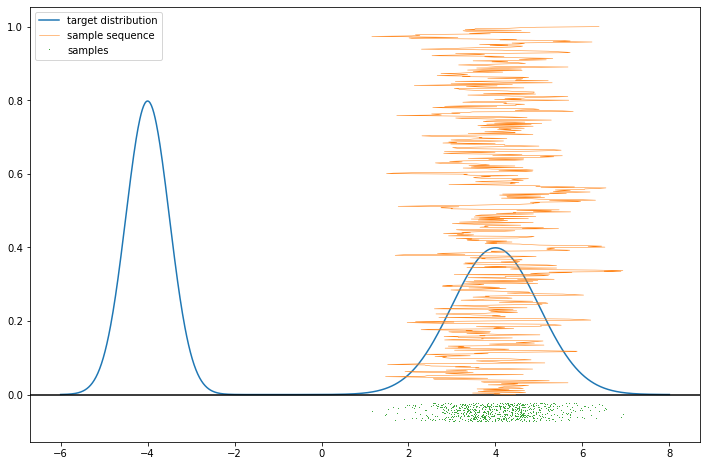

In [6]:
walk(1)

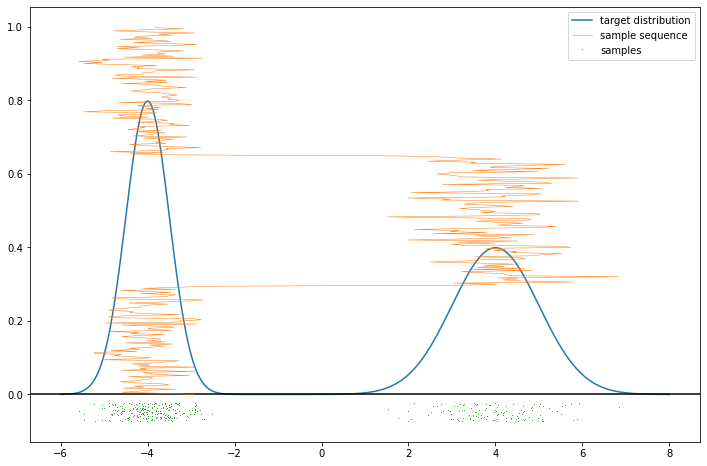

In [7]:
walk(2)

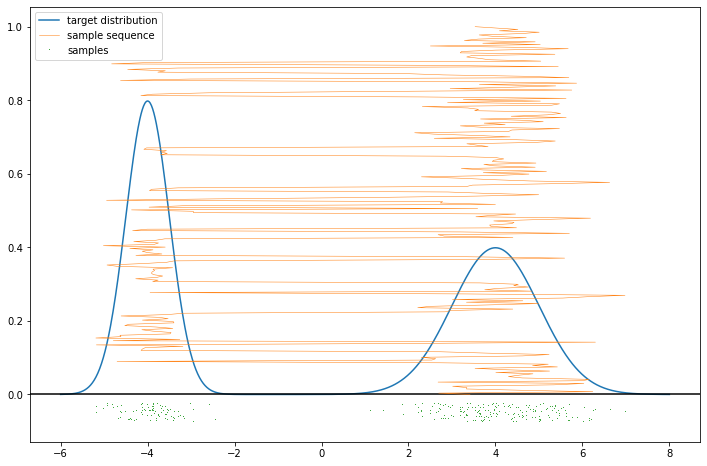

In [8]:
walk(4)